In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model24_0 = Model3(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : nn.MaxPool2d(2),
    post_conv=post_conv0,
)
he_initialization(model24_0)
describe(model24_0)

MACs: 24.14 MMac, Params: 3.4 k
Layer (type:depth-idx)                   Output Shape              Param #
Model3                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─MaxPool2d: 2-3                    [1, 20, 64, 64]           --
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-3             [1, 10, 64, 64]           20
│    │    └─PReLU: 3-4                   [1, 10, 64, 64]           1
├─Sequential: 1-3                        [1, 1, 16,

Loading checkpoint from model_weights/model24_0.pt
Starting
Epoch 1/10: Train loss = 0.5805, Train accuracy = 0.6949, Test loss = 0.5810, Test accuracy = 0.6875


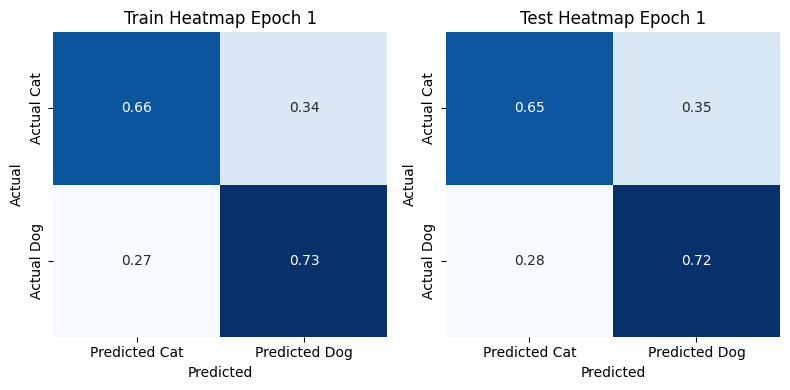

Epoch 2/10: Train loss = 0.5281, Train accuracy = 0.7358, Test loss = 0.5334, Test accuracy = 0.7295


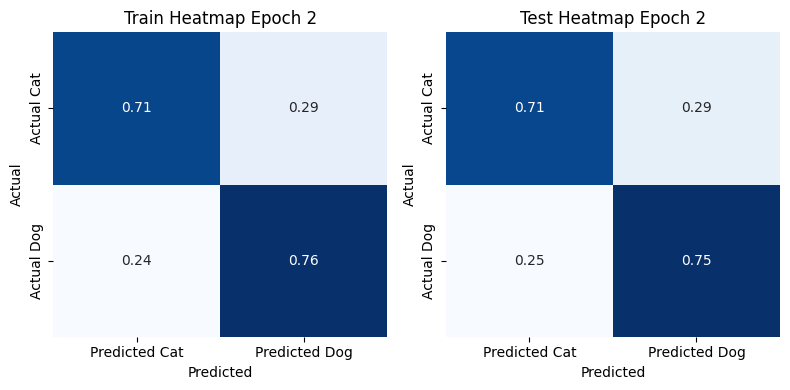

Epoch 3/10: Train loss = 0.5060, Train accuracy = 0.7552, Test loss = 0.5146, Test accuracy = 0.7412


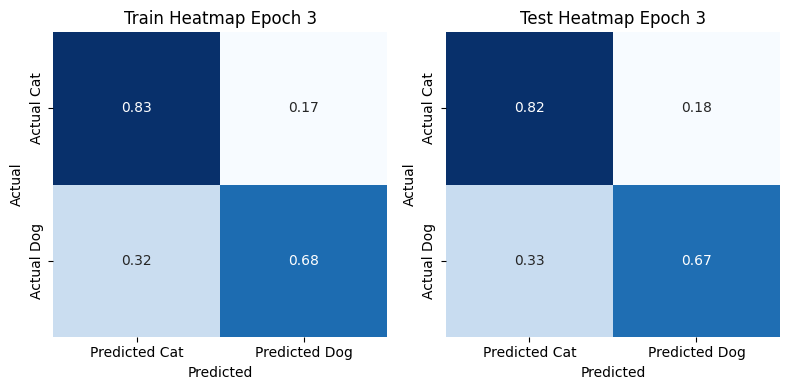

Epoch 4/10: Train loss = 0.4865, Train accuracy = 0.7650, Test loss = 0.5051, Test accuracy = 0.7555


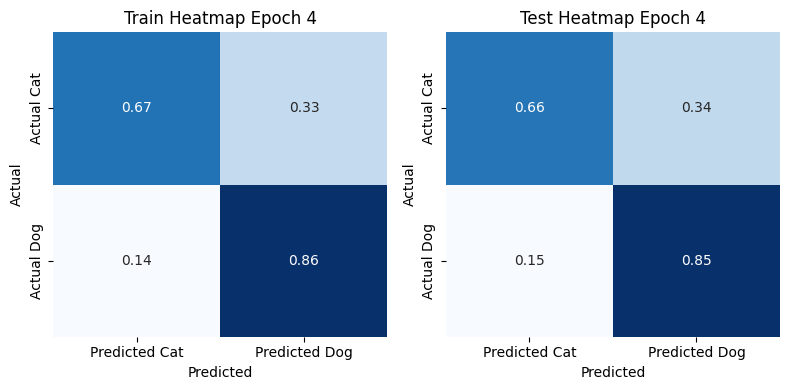

Epoch 5/10: Train loss = 0.4378, Train accuracy = 0.7937, Test loss = 0.4569, Test accuracy = 0.7824


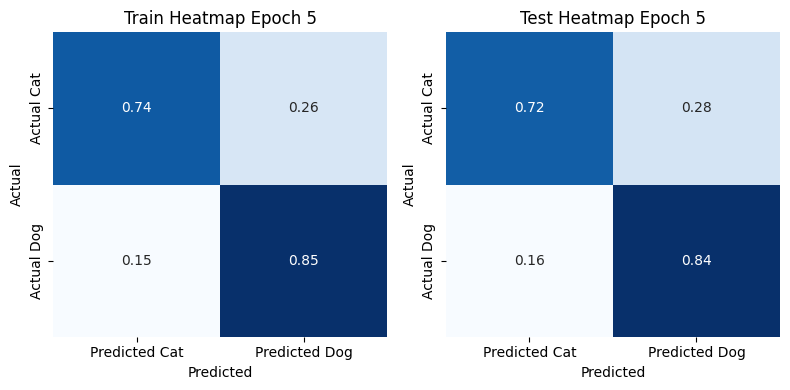

Epoch 6/10: Train loss = 0.4270, Train accuracy = 0.8038, Test loss = 0.4422, Test accuracy = 0.7896


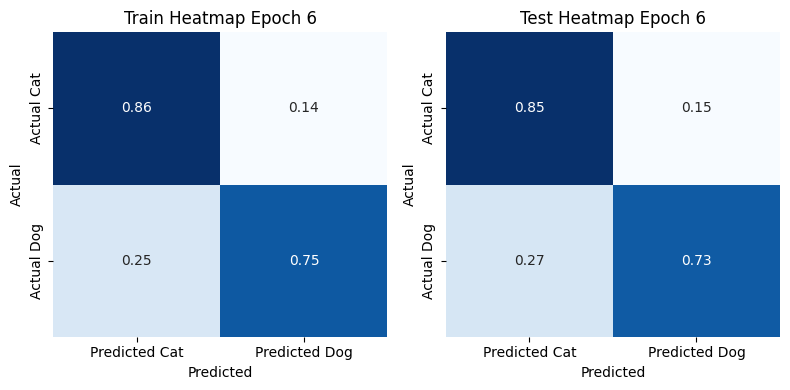

Epoch 7/10: Train loss = 0.4268, Train accuracy = 0.8020, Test loss = 0.4453, Test accuracy = 0.7890


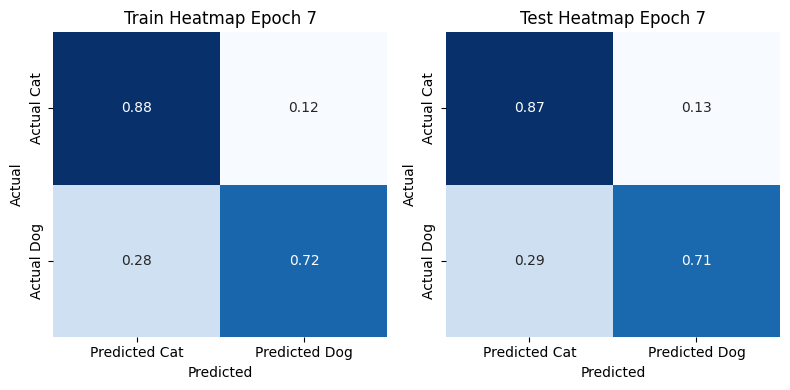

Epoch 8/10: Train loss = 0.3885, Train accuracy = 0.8257, Test loss = 0.4137, Test accuracy = 0.8063


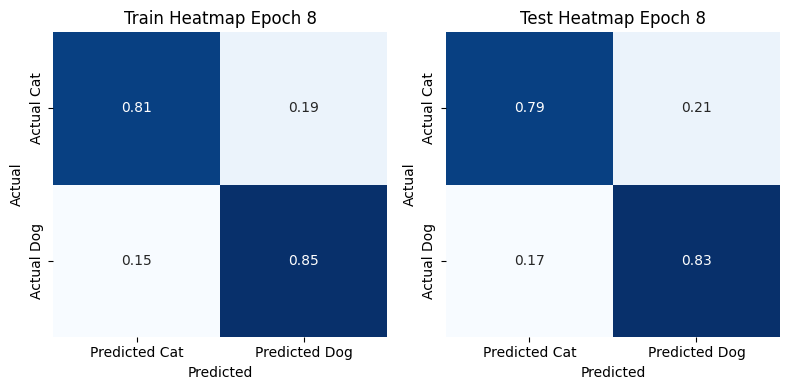

Epoch 9/10: Train loss = 0.3869, Train accuracy = 0.8265, Test loss = 0.4128, Test accuracy = 0.8069


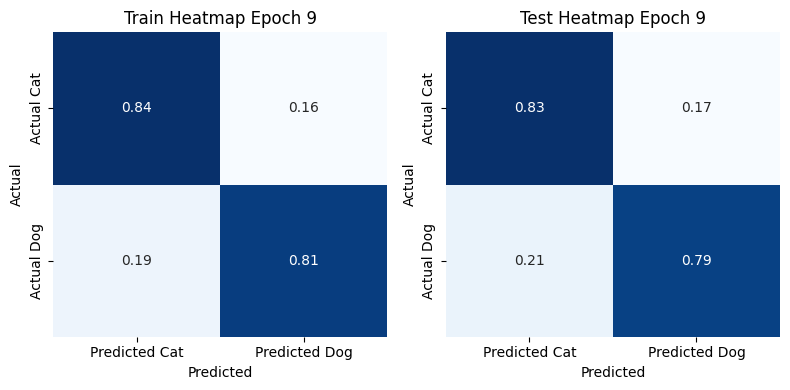

Epoch 10/10: Train loss = 0.3824, Train accuracy = 0.8299, Test loss = 0.4108, Test accuracy = 0.8078


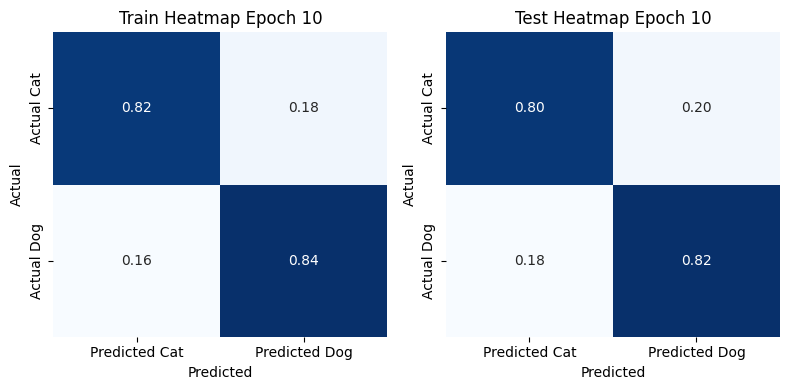

Training complete.


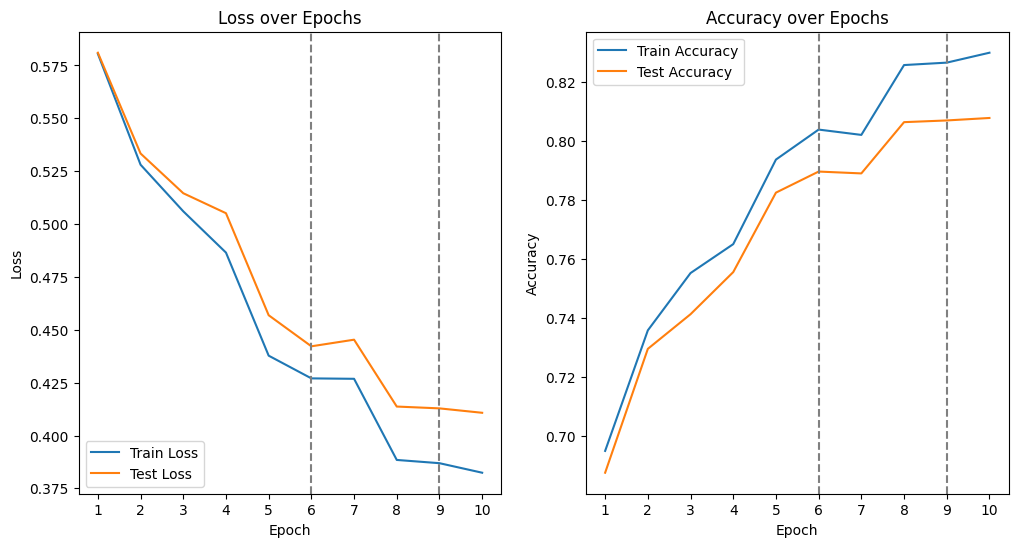

In [5]:
train(model24_0,"model_weights/model24_0.pt",criterion,train_dataset,test_dataset)